# QM9SPol


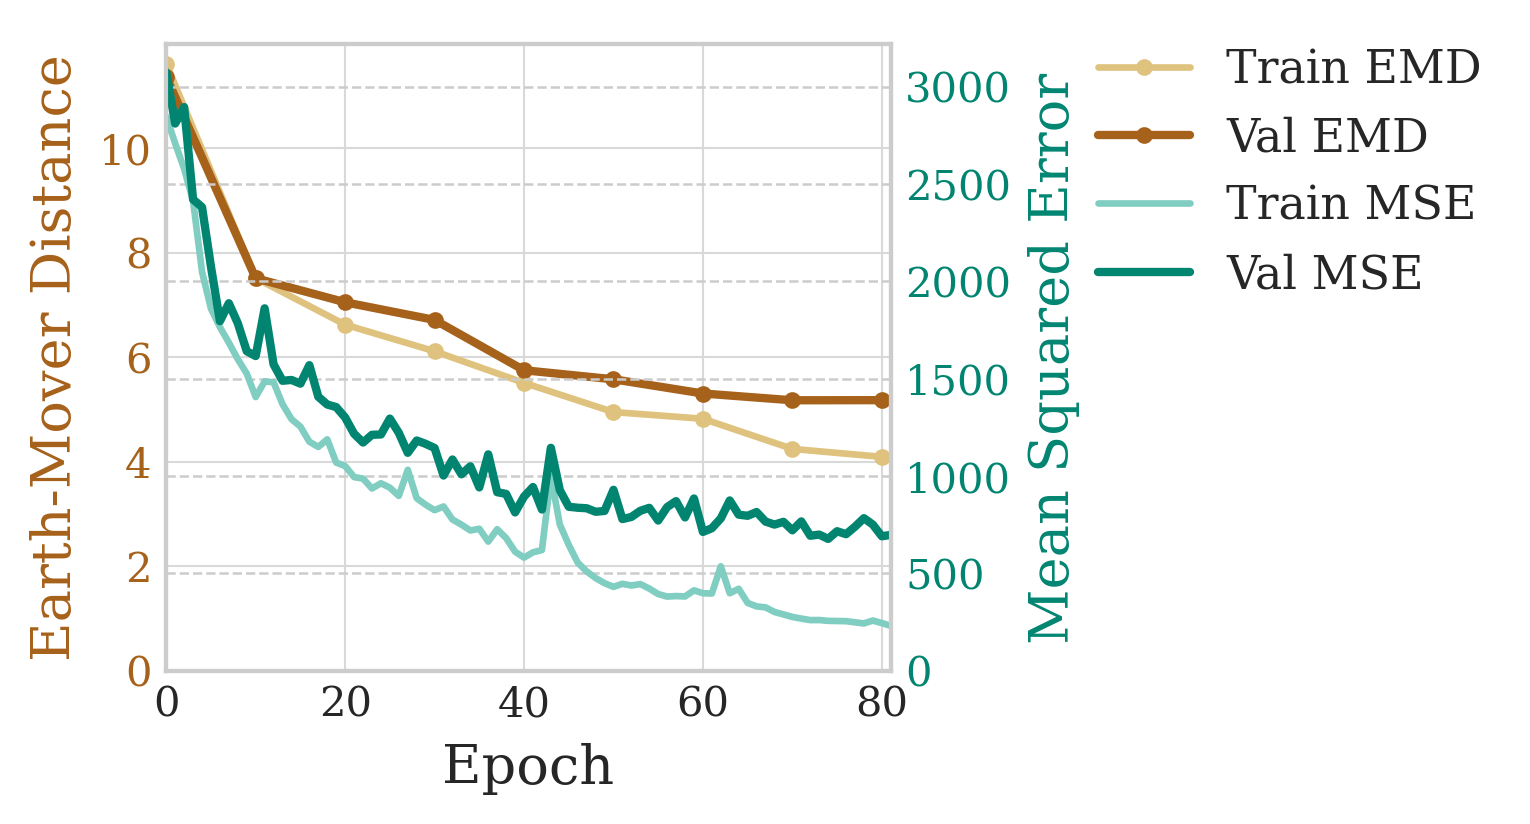

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0.  Global font settings (add THIS block)
# ------------------------------------------------------------------
plt.rcParams.update({
    "font.size": 13,        # base font
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 11,
    "figure.titlesize": 11
})

# ------------------------------------------------------------------
# 1. CSV paths ––– replace with your filenames
# ------------------------------------------------------------------
emd_csv = "emd_OPT_KITQM9_Shifted61spectra90epochs_32batchsize_0.0005lr_6cutoff_6numblock_256features_32att_KITQM9_seed3512.csv"
mse_csv = "mse_OPT_KITQM9_Shifted61spectra90epochs_32batchsize_0.0005lr_6cutoff_6numblock_256features_32att_KITQM9_seed3512.csv"
# ------------------------------------------------------------------

emd_df = pd.read_csv(emd_csv)
mse_df = pd.read_csv(mse_csv)

# auto-detect the right columns
val_emd_col   = next(c for c in emd_df.columns if "val_emd_loss"   in c)
train_emd_col = next(c for c in emd_df.columns if "emd_loss"      in c and "val" not in c)
val_mse_col   = next(c for c in mse_df.columns if "epoch_val_loss" in c)
train_mse_col = next(c for c in mse_df.columns if "loss_per_epoch" in c)

epochs_emd = emd_df["epoch"].values
epochs_mse = mse_df["epoch"].values

val_emd,   train_emd = emd_df[val_emd_col],   emd_df[train_emd_col]
val_mse,   train_mse = mse_df[val_mse_col],   mse_df[train_mse_col]

# ------------------------------------------------------------------
# 2. Plot
# ------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=300)
ax2 = ax1.twinx()

# EMD (left axis)
ax1.plot(epochs_emd, train_emd, color="#dfc27d", lw=1.6, marker="o", ms=3, label="Train EMD")
ax1.plot(epochs_emd, val_emd,   color="#a6611a", lw=2.0, marker="o", ms=3, label="Val EMD")
ax1.set_ylabel("Earth-Mover Distance", color="#a6611a")
ax1.tick_params(axis="y", colors="#a6611a")
ax1.set_ylim(bottom=0)

# MSE (right axis)
ax2.plot(epochs_mse, train_mse, color="#80cdc1", lw=1.6, label="Train MSE")
ax2.plot(epochs_mse, val_mse,   color="#018571", lw=2.0, label="Val MSE")
ax2.set_ylabel("Mean Squared Error", color="#018571")
ax2.tick_params(axis="y", colors="#018571")
ax2.set_ylim(bottom=0)

ax1.set_xlabel("Epoch")

# legend (uses rcParams["legend.fontsize"])
fig.legend(ax1.get_lines() + ax2.get_lines(),
           [l.get_label() for l in ax1.get_lines() + ax2.get_lines()],
           loc="upper center", bbox_to_anchor=(1.20, 1.05),
           frameon=False)

ax1.grid(which="major", axis="both", color="0.85", lw=0.5)
ax1.set_axisbelow(True)
ax2.grid(which="major", axis="y", color="0.8", lw=0.6, linestyle="--")

fig.tight_layout(pad=0)
fig.savefig("training_curves_improved.png", bbox_inches="tight")

plt.xlim(0, 81)
plt.show()


# HOPV15

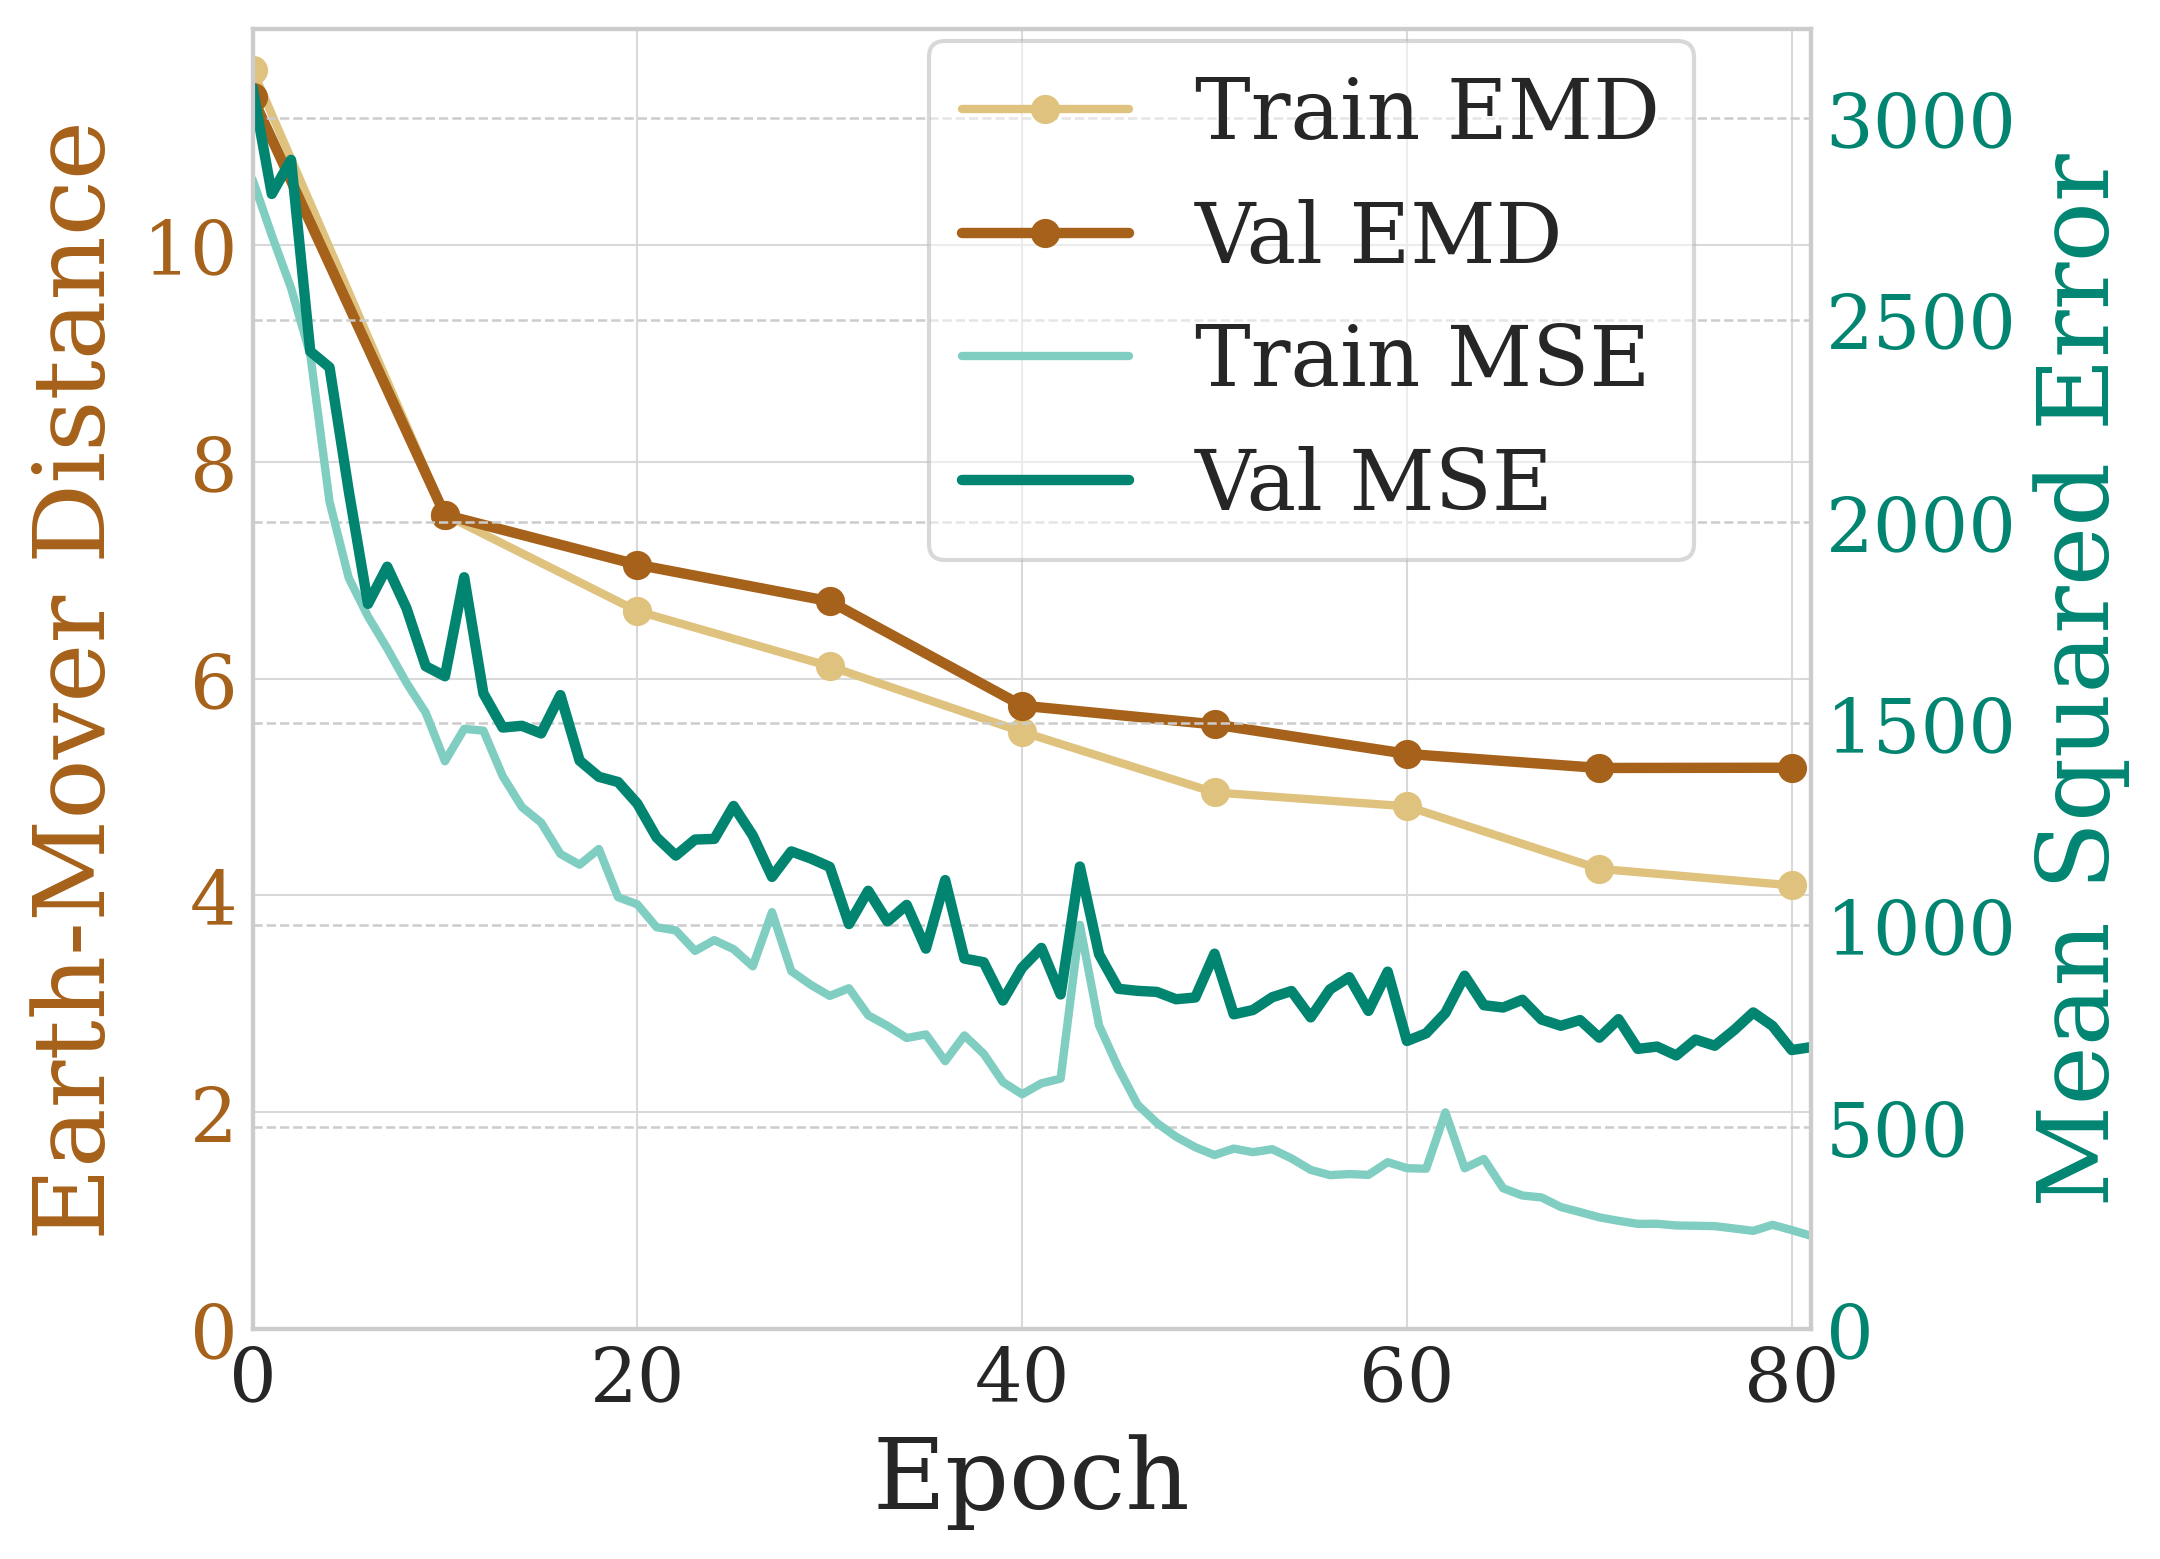

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. CSV paths ––– replace with your filenames
# ------------------------------------------------------------------
emd_csv = "emd_OPT_KITQM9_Shifted61spectra90epochs_32batchsize_0.0005lr_6cutoff_6numblock_256features_32att_KITQM9_seed3512.csv"   # file with *val_emd_loss*
mse_csv = "mse_OPT_KITQM9_Shifted61spectra90epochs_32batchsize_0.0005lr_6cutoff_6numblock_256features_32att_KITQM9_seed3512.csv"   # file with *epoch_val_loss*
# ------------------------------------------------------------------

emd_df = pd.read_csv(emd_csv)
mse_df = pd.read_csv(mse_csv)

# auto-detect the right columns
val_emd_col   = next(c for c in emd_df.columns if "val_emd_loss"   in c)
train_emd_col = next(c for c in emd_df.columns if "emd_loss"      in c and "val" not in c)
val_mse_col   = next(c for c in mse_df.columns if "epoch_val_loss" in c)
train_mse_col = next(c for c in mse_df.columns if "loss_per_epoch" in c)

epochs_emd = emd_df["epoch"].values
epochs_mse = mse_df["epoch"].values

val_emd,   train_emd = emd_df[val_emd_col],   emd_df[train_emd_col]
val_mse,   train_mse = mse_df[val_mse_col],   mse_df[train_mse_col]

# ------------------------------------------------------------------
# 2.  Plot
# ------------------------------------------------------------------
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")  # 1) global style
plt.rcParams.update({                    # 2) fine-tune fonts
    "font.family": "serif",
    "font.serif":  ["Times New Roman", "Times", "DejaVu Serif", "Georgia"],
    "font.size":        16,   # default text size
    "axes.labelsize":   24,   # x/y/z axis labels
    "axes.titlesize":   18,   # figure / axes titles
    "xtick.labelsize":  18,   # x-axis tick labels
    "ytick.labelsize":  18,   # y-axis tick labels
    "legend.fontsize":  20,   # legend text
})

fig, ax1 = plt.subplots(figsize=(7, 5), dpi=300)
ax2 = ax1.twinx()

# EMD (left axis, blue)
ax1.plot(epochs_emd, train_emd, color="#dfc27d", lw=2, marker="o", ms=6, label="Train EMD")
ax1.plot(epochs_emd, val_emd,   color="#a6611a", lw=2.5, marker="o", ms=6, label="Val EMD")
ax1.set_ylabel("Earth-Mover Distance", color="#a6611a", )
ax1.tick_params(axis="y", colors="#a6611a", )
ax1.set_ylim(bottom=0)

# MSE (right axis, red)
ax2.plot(epochs_mse, train_mse, color="#80cdc1", lw=2, label="Train MSE")
ax2.plot(epochs_mse, val_mse,   color="#018571", lw=2.5,
         marker="", ms=3, label="Val MSE")
ax2.set_ylabel("Mean Squared Error", color="#018571", )
ax2.tick_params(axis="y", colors="#018571", )
ax2.set_ylim(bottom=0)

ax1.set_xlabel("Epoch", )
ax1.tick_params(axis="x", )

# -----------------------------------------------------------
# combine handles from both axes
lines  = ax1.get_lines() + ax2.get_lines()
#lines  = [train_emd_line, val_emd_line, train_mse_line, val_mse_line]

labels = [l.get_label() for l in lines]

# -------- OPTION A: outside top-right (best for papers) -----
fig.legend(lines, labels,
           loc="upper center",           # anchor to fig, not axes
           bbox_to_anchor=(0.61, 1.02),  # x≈1 (right edge), y just above
           ncol=1, 
            frameon=True,
            facecolor="white",
            edgecolor="0.7",
            framealpha=0.5,
            markerscale=1,)


ax1.grid(which="major", axis="both",
         color="0.85", lw=0.5, linestyle="-")
ax1.set_axisbelow(True)

# right-axis (MSE) grid: dashed
ax2.grid(which="major", axis="y",
         color="0.8", lw=0.6, linestyle="--")   # <–– dashed here

# -------- OPTION B: inside lower-right ----------------------
# ax1.legend(lines, labels,
#            loc="lower right",
#            frameon=False, fontsize=7,
#            handletextpad=0.4, borderaxespad=0.3)

              # suppress right-axis grid

# (keep everything else the same)


fig.tight_layout(pad=0)
fig.savefig("training_curves_improved.png", bbox_inches="tight")
plt.xlim(0,81)
plt.show()
